In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

In [2]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warm springs"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all
Train Basin File Exists: True


In [3]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":1,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [4]:
lstmNoPhysics.train(period='validation')

2024-12-19 18:14:55,196: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_1912_181455/output.log initialized.


2024-12-19 18:14:55,200: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_1912_181455
2024-12-19 18:14:55,217: ### Run configurations for testing_run
2024-12-19 18:14:55,219: experiment_name: testing_run
2024-12-19 18:14:55,222: train_basin_file: warm springs
2024-12-19 18:14:55,226: validation_basin_file: warm springs
2024-12-19 18:14:55,228: test_basin_file: warm springs
2024-12-19 18:14:55,230: train_start_date: 1994-10-01 00:00:00
2024-12-19 18:14:55,232: train_end_date: 2002-09-30 00:00:00
2024-12-19 18:14:55,234: validation_start_date: 2002-10-01 00:00:00
2024-12-19 18:14:55,242: validation_end_date: 2005-09-30 00:00:00
2024-12-19 18:14:55,245: test_start_date: 2005-10-01 00:00:00
2024-12-19 18:14:55,247: test_end_date: 2009-09-30 00:00:00
2024-12-19 18:14:55,251: device: cpu
2024-12-19 18:14:55,253: physics_informed: False
2024-12-19 18:14:55,265: physics_data_file: None
2024-12-19 18:14:55,291: validate_every:

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


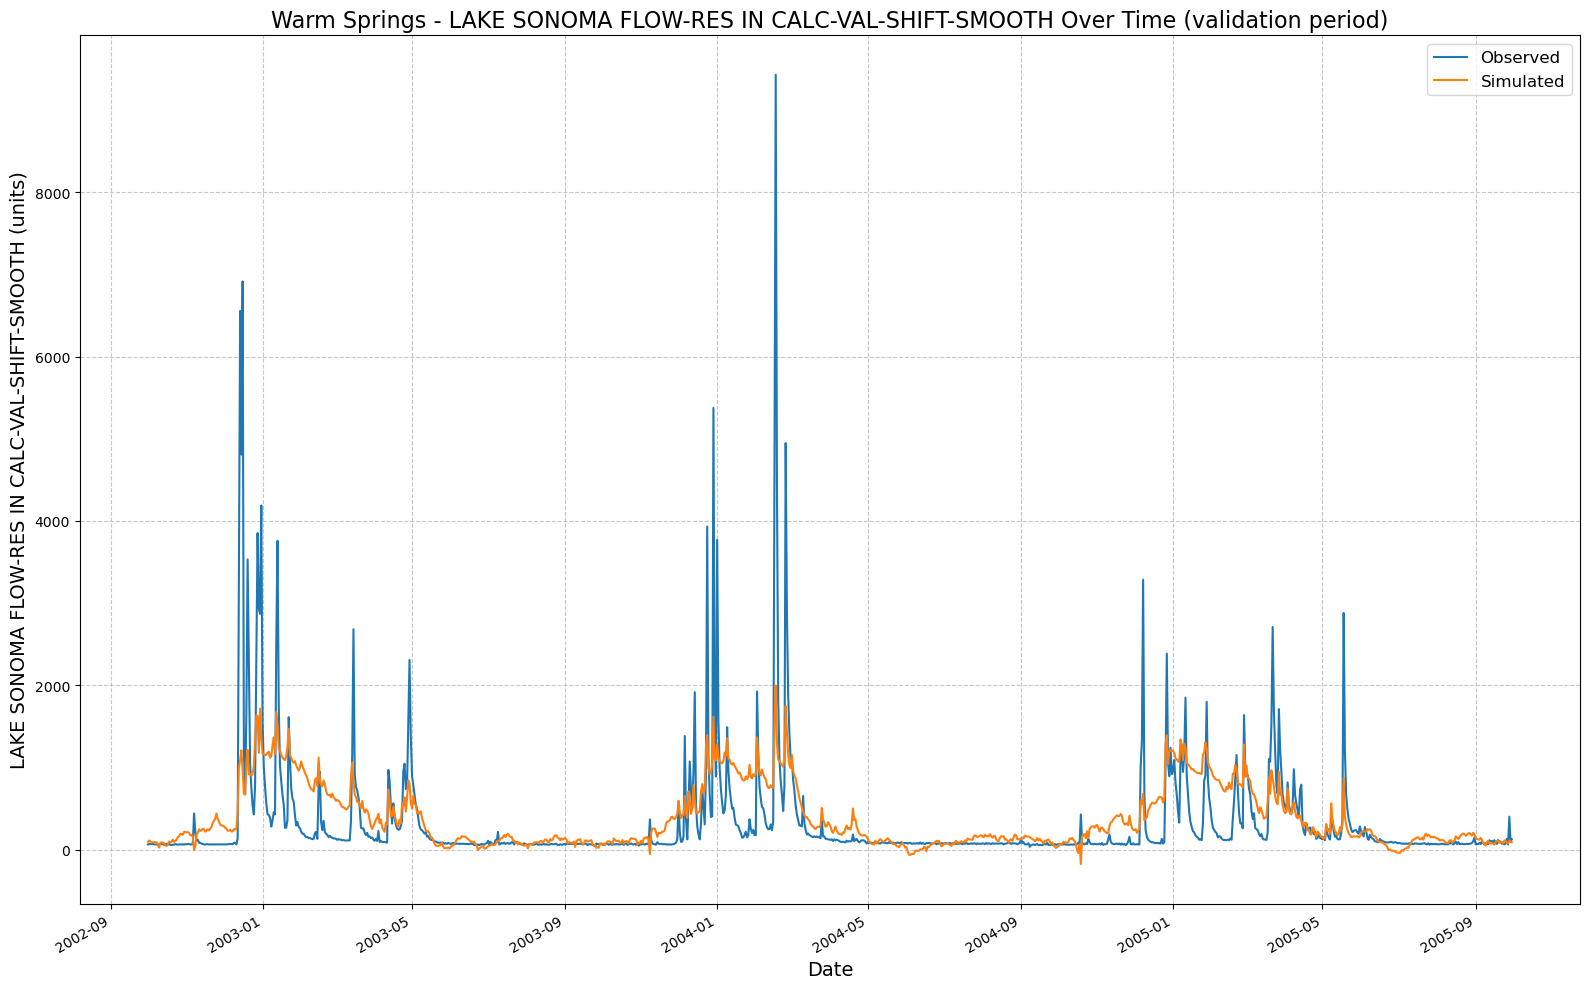

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_1912_181455/results_output_validation.csv


{'NSE': 0.3743590712547302,
 'MSE': 306747.75,
 'RMSE': 553.8481290028883,
 'KGE': 0.38022413472932226,
 'Alpha-NSE': 0.5376085392253558,
 'Beta-KGE': 1.1669373512268066,
 'Beta-NSE': 0.07761063994940828,
 'Pearson-r': 0.6225769204989104,
 'FHV': -65.06993770599365,
 'FMS': 14.545309682831975,
 'FLV': -2538.9436431342583,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 75.74727058410645}

In [5]:
lstmNoPhysics.results('validation')

In [7]:
lstmNoPhysics.train(period='test')

2024-12-19 18:16:15,207: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_1912_181455/testing_run_1912_181615/output.log initialized.
2024-12-19 18:16:15,239: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_1912_181455/testing_run_1912_181615
2024-12-19 18:16:15,243: ### Run configurations for testing_run
2024-12-19 18:16:15,245: experiment_name: testing_run
2024-12-19 18:16:15,250: train_basin_file: warm springs
2024-12-19 18:16:15,254: validation_basin_file: warm springs
2024-12-19 18:16:15,260: test_basin_file: warm springs
2024-12-19 18:16:15,267: train_start_date: 1994-10-01 00:00:00
2024-12-19 18:16:15,269: train_end_date: 2002-09-30 00:00:00
2024-12-19 18:16:15,272: validation_start_date: 2002-10-01 00:00:00
2024-12-19 18:16:15,307: validation_end_date: 2005-09-30 00:00:00
2024-12-19 18:16:15,310: test_start_date: 2005-10-01 00:00:00
2024-12-19 18:16:15,319: test

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


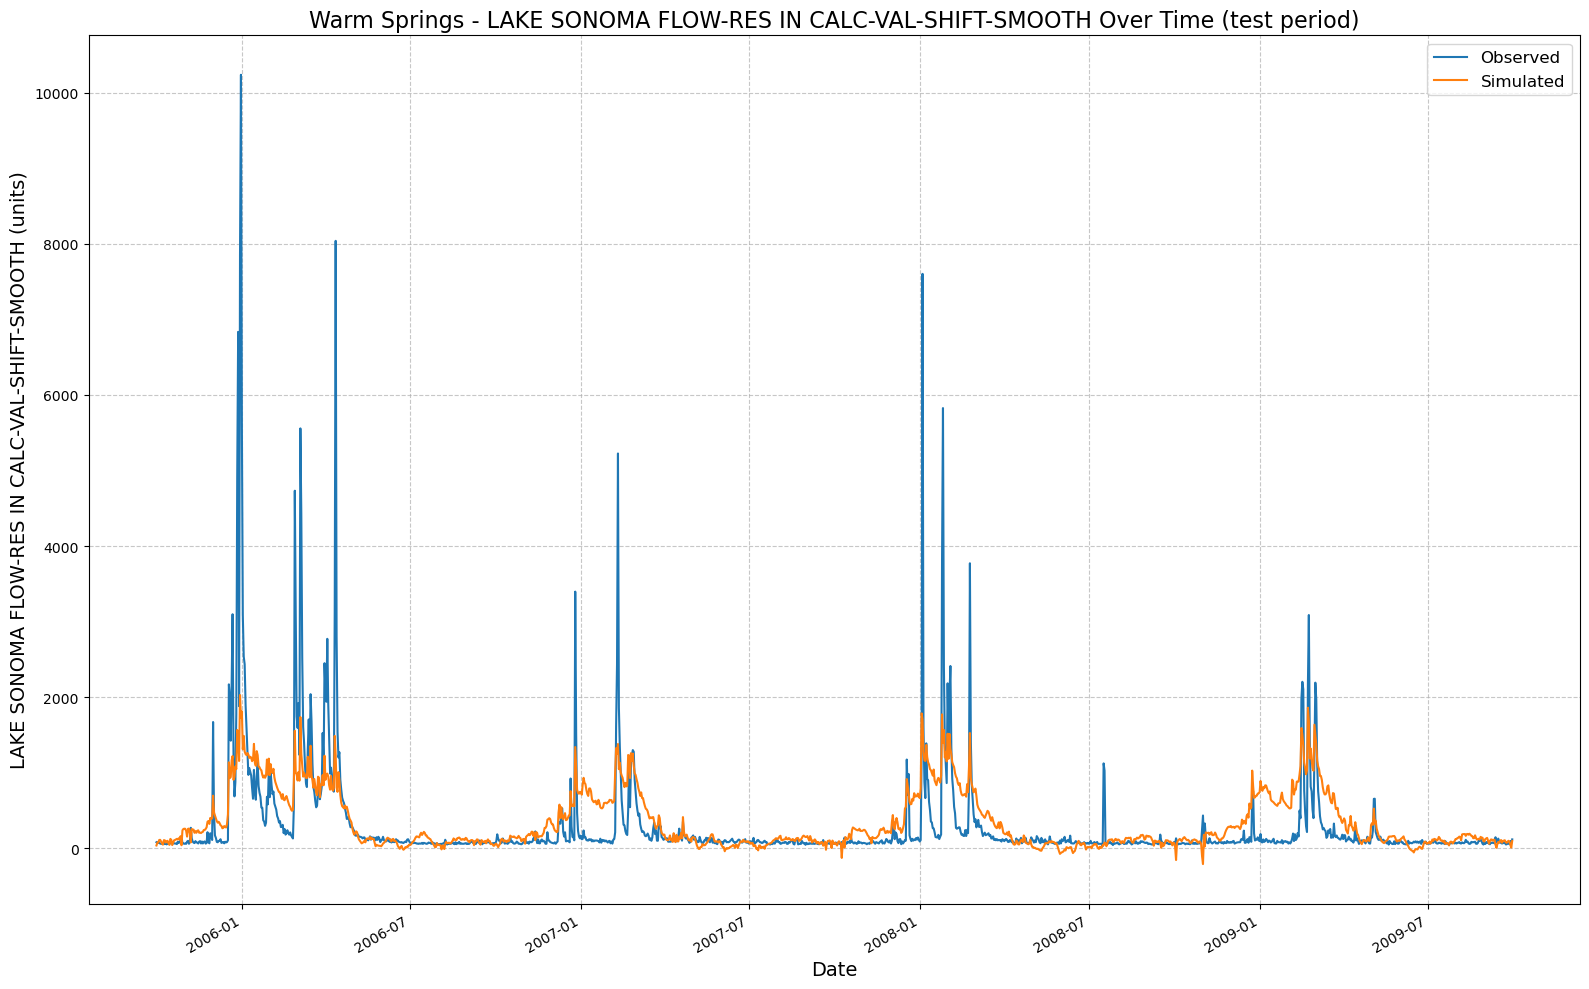

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_1912_181455/testing_run_1912_181615/results_output_test.csv


{'NSE': 0.40884649753570557,
 'MSE': 316358.4375,
 'RMSE': 562.4574983943231,
 'KGE': 0.38883836352691525,
 'Alpha-NSE': 0.5166316677205703,
 'Beta-KGE': 1.150512933731079,
 'Beta-NSE': 0.061211584001767454,
 'Pearson-r': 0.6576267270572576,
 'FHV': -63.72919678688049,
 'FMS': 87.99942183601705,
 'FLV': -1945.7740496738918,
 'Peak-Timing': 0.8333333333333334,
 'Peak-MAPE': 76.71299775441489}

In [8]:
lstmNoPhysics.results('test')